### Задача 1

1 января 2016 года на двух телеканалах разместили два ролика с различными номерами заказа такси. В течение недели оба ролика прокрутили по 50 000 раз. 
В течении этой недели на первый номер поступило 10 000 звонков и было совершено 7 670 поездок,
а на второй — 12 000 звонков и 8100 поездок.
Маркетолог просит у вас совета: какой канал оставить, а какой отключить?
Что вы ему ответите? Обоснуйте свой ответ.

### Решение 1 

Во многом решение зависит от политики компании (для общей задачи). Но попробуем разобрать все варианты на приведенных цифрах: 
1. Политика: увеличить прибыль. 
	1.1. Если предположить:
		А. что стоимость обработки 1 звонка стоит Х1 (оплата работы специалистов колл-центра, побочные расходы).
		Б. прибыль с одной поездки Х2.
	То решение выбора можно принять вычислив какое значение больше:
		Х2*7670 - Х1*10000  или Х2*8100 - Х1*12000 
	Т.к. с большой вероятностью обработка звонка превышает прибыль с поездки более чем в 4.65 раз(рассчитано при равенстве левой и право части уровнения выше),	а я думаю компании известны точные цифры или есть данные на основе которых их можно вычислить,то выгоднее второй вариант. 

2. Политика: привлечение новых клиентов.
	Тут также выигрывает вторая реклама, т.к. больше возможности привлечения клиентов и больше поездок. 

3. Статистический подход (сферические звонки в вакууме):
	Причины по которым звонили но не совершали поездки:
		1. Реклама может быть неправильно воспринята частью "зрителей" что в итоге приводит к неуспешным звонкам. Такие нам не нужны
		2. Обращаются клиенты, которых компания не может обслужить. Такие (пока) тоже не нужны компании. 
        
	Процент правильных звонков от рекламы:
		76.6% против 67.5%
	Но сложно сказать, почему этот показатель может быть решающим в выборе рекламы. 1/1 дает 100%, но такая реклама себя не окупит.

Ответ: проанализировав разные подходы, я бы посоветовал оставить второй канал. 
Или оставить оба и набрать еще данных, т.к. данные за праздники не очень репрезентативны. 

### Задача 2

При доставке товара, заказчик может оценить качество работы курьера, либо положительно (поставив «лайк»), либо отрицательно (поставив «дислайк»). 
Предложите систему (формулу или набор правил) расчета рейтинга курьеров на основе истории их оценок, которая позволила бы определять и отсеивать курьеров, 
которые работают хуже остальных (код или какие-то другие материалы, созданные в ходе решения приветствуются).

### Решение 2

Из формулировки задачи следует, что заказчик может и не оценить курьера. В такое случае, нейтральная оценка пусть будет 0, лайк +1, дислайк -1. 
Но простое суммирование будет некорретно, нужно учитывать количество оценок. 
А если использовать среднее значение, у нас будет распределение между -1 и 1, но у новичков, которые выполнили (не очень успешно) только один заказ будет худший рейтинг. Попробуем добавить к среднему значению зависимость от кол-ва оценок.  


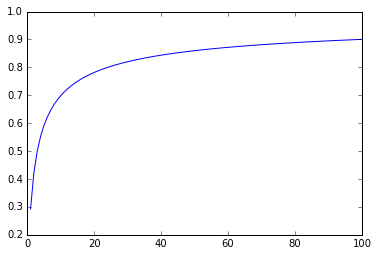

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Проверим рост рейтинга при одних положительных оценках. к - кол-во оценок.
def M(k):
    return 1 - 1.0/(k+1)**0.5

t=[]
for i in range(1,101):
     t.append(M(i))  
    
plt.plot(np.arange(1, len(t)+1), t)

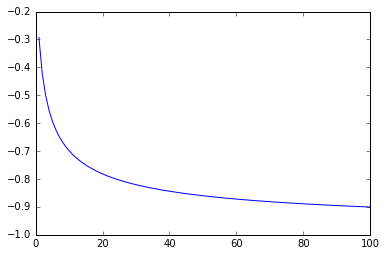

In [2]:
# формула для всех оценок k1- count likes and k2 count dislikes
def M1(k1,k2):
    return float(k1 - k2)/(k1+k2)*(1 - 1/(k1+k2+1)**0.5)

#рост минусов должен уменшать рейтинг.     
t=[]
for i in range(1,101):
     t.append(M1(0,i))  
    
plt.plot(np.arange(1, len(t)+1), t)

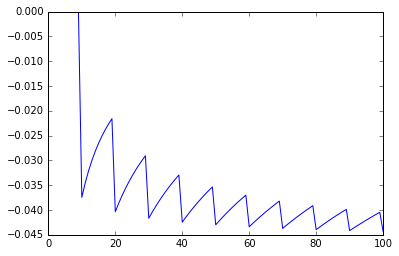

In [3]:
#медленный прирост минусов также должен уменшать рейтинг.     
t=[]
for i in range(1,101):
     t.append(M1(i,int(1.1*i)))  
    
plt.plot(np.arange(1, len(t)+1), t) 

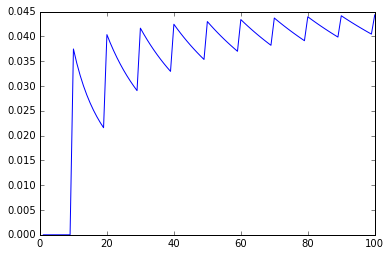

In [4]:
# а для плюсов увеличивать.     
t=[]
for i in range(1,101):
     t.append(M1(int(1.1*i),i))  
    
plt.plot(np.arange(1, len(t)+1), t) 

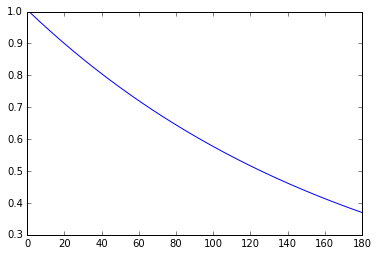

In [5]:
#Теперь осталось добавить вес по времени каждой оценке. Например нам не очень интересно что было год назад, 
#а что было в последний месяц очень интересно
def Ti(K, days):
    return K*np.exp(-1*float(days)/180)

ti = []
for i in range(180):
     ti.append(Ti(1,i))   

plt.plot(np.arange(1, len(ti)+1), ti) 

In [9]:
# Составим итоговую формулу, которая принимает на вход ряд оценок и ряд кол-ва дней, прошедих с момента каждой оценки

score = [-1,-1,-1,1,1,1,1,1,1,1]
days =[100,90,80,7,6,5,4,4,1,0]

def S(score,days):
    f = []
    for i in range(len(score)):
        f.append(score[i]*np.exp(-1*float(days[i])/180))
    #пересчитали все оценки с учетом даты и сохранили в f     #float(k1 - k2)/(k1+k2) это теперь np.mean(f). k1+k2 =len(f)
    return np.mean(f)*(1-1/(len(f)+1)**0.5)


print S(score,days)

# если плохие оценки были еще раньше, то рейтинг должен вырасти:
score = [-1,-1,-1,1,1,1,1,1,1,1]
days =[300,200,200,7,6,5,4,4,1,0]
print S(score,days)

0.351390034427
0.419437001132


Как результат, формула может проставить рейтинг каждому курьеру. Также она учитывает время проставления оценки и отдает предпочтение последним оценкам. И конечно учитывается кол-во оценок. Новые курьеры получают оценку 0, и первые заказы не "вгоняют" их в -1. N курьеров с минимальным рейтингом можно отсеять как худших. 

### Задача 3

На основе тренировочного множества (classification_train.csv) постройте модель, которая сможет определять по входных данных (все столбцы, кроме target),  
произойдет событие (target = 1) или нет (target = 0) . На основе разработанной модели составьте прогноз для тестового множества (classification_test.csv).  
Приложите описание решения (код или какие-то другие материалы, созданные в ходе решения приветствуются). Приложите прогноз в виде, представленном в sample submission.csv 

In [100]:
#Попробую решить используя RF и KNN. Решение на xgboost будет не самым наглядным. 

import pandas as pd

train = pd.read_csv('C:/just/testcase/classification_train.csv')
test  = pd.read_csv('C:/just/testcase/classification_test.csv')
subm = pd.read_csv('C:/just/testcase/sample submission.csv')

In [175]:
#print train.head()
#print test.head()
print train.describe()
#print subm.head()

       time_interval  numerical_feature1  binary_feature1  numerical_feature2  \
count   18420.000000        18420.000000     18420.000000        18420.000000   
mean       15.626059           -0.004637         0.040011           -0.000295   
std        10.576227            1.000443         0.195990            0.999527   
min         0.000000           -1.807835         0.000000           -0.202881   
25%         6.000000           -0.779939         0.000000           -0.202881   
50%        14.000000           -0.265991         0.000000           -0.202881   
75%        25.000000            0.504930         0.000000           -0.202881   
max        35.000000            5.901382         1.000000            9.879596   

       numerical_feature3  numerical_feature4  numerical_feature5  \
count        18420.000000        18420.000000        18420.000000   
mean             0.003799            0.000736            0.005228   
std              1.008043            1.003409            1.0057

In [101]:
train=train.fillna(value=-99999, axis=0)
test=test.fillna(value=-99999, axis=0)

#проверив статистику по данным, обнаружили только 1 категориальный признак. Переведем его в дамми
dtrain = pd.get_dummies(train[u'day_of_week'],prefix='day_')
train=pd.concat([train,dtrain], axis=1)
del train[u'day_of_week']
del train[u'row_number']

dtest = pd.get_dummies(test[u'day_of_week'],prefix='day_')
test=pd.concat([test,dtest], axis=1)
del test[u'day_of_week']

# Выделим 20% трейна для валидации
from sklearn.cross_validation import ShuffleSplit
for itr, ite in ShuffleSplit(len(train), n_iter=1, train_size=0.8, test_size=0.2, random_state=42):
    pass

target=u'target'

features = []
for c in train.columns:
    if c in test.columns and c!= target:
        features += [c]

In [102]:
#Начнем с KNN 
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics



train_normalized = preprocessing.normalize(train[features], norm='l2')
test_normalized = preprocessing.normalize(test[features], norm='l2')

neigh = KNeighborsClassifier(n_neighbors=10)
xtrain = train_normalized[itr]
ytrain = train.loc[itr, target]
xval = train_normalized[ite]
yval = train.loc[ite, target]

neigh.fit(xtrain, ytrain)
crval=neigh.predict_proba(xval)
q1=np.array(yval)
q2=np.array(crval)

# Пусть метрикой будет AUC
print metrics.roc_auc_score(q1, q2[:,1]) 

0.698707982527


In [103]:
#посчитаем для разного кол-ва сосдедей и найдем оптимальное
for i in range(1,100,5):
    neigh = KNeighborsClassifier(n_neighbors=i)
    xtrain = train_normalized[itr]
    ytrain = train.loc[itr, target]
    xval = train_normalized[ite]
    yval = train.loc[ite, target]
    neigh.fit(xtrain, ytrain)
    crval=neigh.predict_proba(xval)
    q1=np.array(yval)
    q2=np.array(crval)
    print i, metrics.roc_auc_score(q1, q2[:,1]) 

1 0.614317452408
6 0.684883660932
11 0.704168392747
16 0.706497090602
21 0.709131544303
26 0.712680169655
31 0.714786995499
36 0.713907763162
41 0.716056162366
46 0.715449220794
51 0.71650639301
56 0.718446925414
61 0.719103106356
66 0.719077454708
71 0.719325568059
76 0.719178144796
81 0.718605552845
86 0.717357762351
91 0.717901017073
96 0.718309969203


In [124]:
#Результат КНН на валидации не выше ~0.72
#Попробуем использовать другую модель
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=6)
xtrain = train.loc[itr]
ytrain = train.loc[itr, target]
xval = train.loc[ite]
yval = train.loc[ite, target]

rf.fit(xtrain, ytrain)
crval=rf.predict_proba(xval)
q1=np.array(yval)
q2=np.array(crval)

# Пусть метрикой будет AUC
print metrics.roc_auc_score(q1, q2[:,1]) 

0.99999321853


In [173]:
#Похоже RF хорошо прогнозирует нашу выборку валидации. Выберем оптимальное количество деревьев и предскажем тестовую выборку. 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
xtrain = train.loc[itr]
ytrain = train.loc[itr, target]
xval = train.loc[ite]
yval = train.loc[ite, target]
rf.fit(xtrain, ytrain)
crval=rf.predict_proba(xval)
q1=np.array(yval)
q2=np.array(crval)
# Пусть метрикой будет AUC
print metrics.roc_auc_score(q1, q2[:,1]) 

1.0


In [174]:
subm = pd.read_csv('C:/just/testcase/sample submission.csv')
subm = subm[subm[u'row_number']<0]
subm[u'row_number'] = test[u'row_number']
subm[u'prediction'] = rf.predict_proba(test)[:,1]
subm.to_csv('C:/just/testcase/sample_submission.csv',index=False)